### Principal Component Analysis (Unsupervised Dimensionality Reduction)

let's summarize the approach in a few simple steps:
1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the correspondingeigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k ≤ d ).
6. Construct a projection matrix W from the "top" k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/datapsycho/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
plt.style.use('bmh')
plt.rcParams['font.size'] = 12

### Read the Data

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

### Transform the Data and Find the Eigen Values and Vectors

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
features, targets = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [9]:
feat_train, feat_test, tar_train, tar_test = train_test_split(
    features, targets, 
    test_size=0.3, 
    stratify=targets, 
    random_state=0
)

In [10]:
#standardize the features
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
feat_train_std = sc.fit_transform(feat_train)
feat_test_std = sc.transform(feat_test)

In [12]:
cov_mat = np.cov(feat_train_std.T)

In [13]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [14]:
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

### Find the Eigen Vectors with Highest Variance

In [18]:
tot = sum(eigen_vals)
var_exp = [i/tot for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

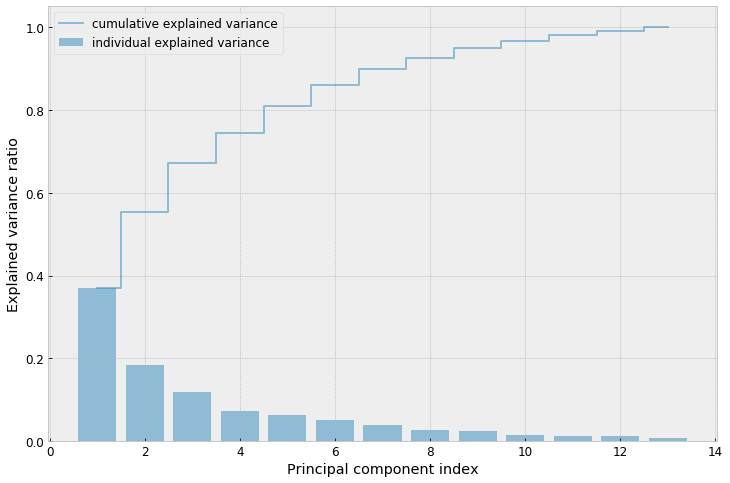

In [19]:
plt.figure(figsize=(12, 8))
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [23]:
eigen_pairs[:3]

[(4.842745315655898,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352255,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203513,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022]))]

In [28]:
# Add a new dimention to each vector for stacking
eigen_pairs[0][1][:, np.newaxis]

array([[-0.13724218],
       [ 0.24724326],
       [-0.02545159],
       [ 0.20694508],
       [-0.15436582],
       [-0.39376952],
       [-0.41735106],
       [ 0.30572896],
       [-0.30668347],
       [ 0.07554066],
       [-0.32613263],
       [-0.36861022],
       [-0.29669651]])

In [30]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [31]:
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

*Note: By executing the preceding code, we have created a 13 x 2-dimensional projection matrix W from the top two eigenvectors.*

Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining $x^{'}$ , now a two-dimensional sample vector consisting of two new features:

\begin{align}
    x^{'} = xW
\end{align}

Similarly, we can transform the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product:

\begin{align}
    X^{'} = XW
\end{align}

In [34]:
feat_train_pca = feat_train_std.dot(w)

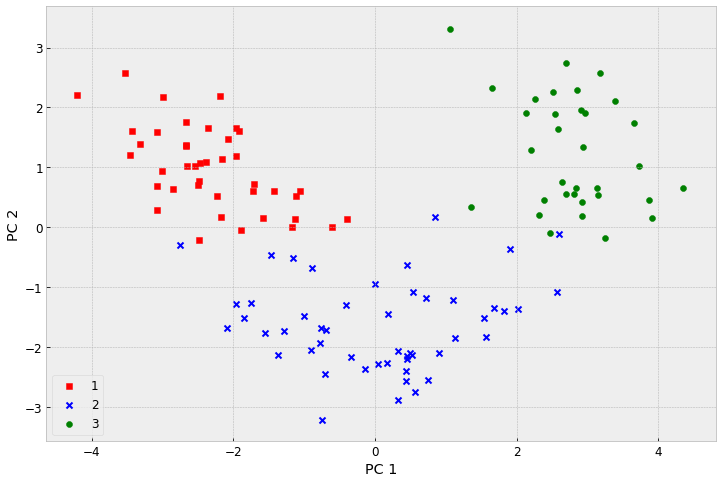

In [39]:
plt.figure(figsize=(12, 8))
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(tar_train), colors, markers):
    plt.scatter(
        feat_train_pca[tar_train==l, 0],
        feat_train_pca[tar_train==l, 1],
        c=c, label=l, marker=m
    )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

### PCA in Scikit-learn

In [41]:
from neuralbase import plot_decision_regions

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

/home/datapsycho/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [47]:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='lbfgs')
feat_train_pca = pca.fit_transform(feat_train_std)
feat_test_pca = pca.transform(feat_test_std)
lr.fit(feat_train_pca, tar_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Decision Region for Train Data')

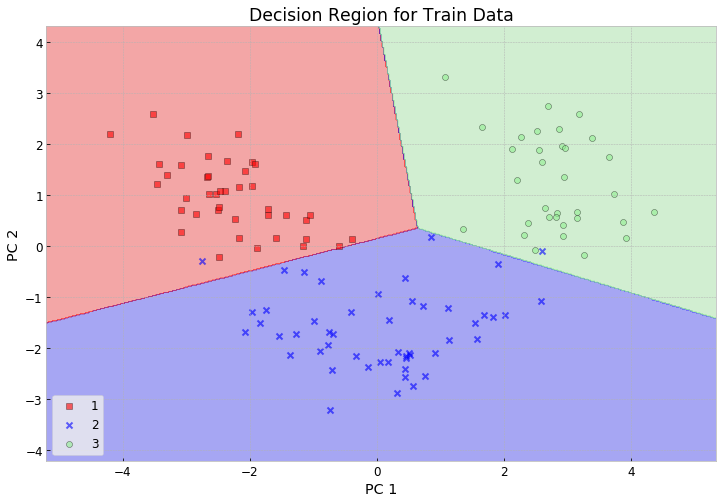

In [53]:
plt.figure(figsize=(12, 8))
plot_decision_regions(feat_train_pca, tar_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title("Decision Region for Train Data")

Text(0.5, 1.0, 'Decision Region for Test Data')

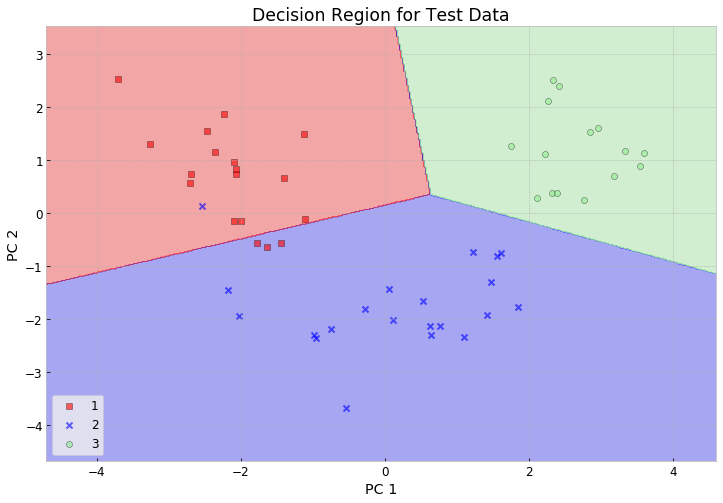

In [55]:
plt.figure(figsize=(12, 8))
plot_decision_regions(feat_test_pca, tar_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title("Decision Region for Test Data")

*Note: If we are interested in the explained variance ratios of the different principal components, we can simply initialize the PCA class with the n_components parameter set to None , so all principal components are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_ attribute*

In [57]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(feat_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])